### Описание данных:

**1. olist_customers_datase.csv** — таблица с уникальными идентификаторами пользователей

* customer_id — позаказный идентификатор пользователя

* customer_unique_id — уникальный идентификатор пользователя (аналог номера паспорта)

* customer_zip_code_prefix — почтовый индекс пользователя

* customer_city — город доставки пользователя

* customer_state — штат доставки пользователя


**2. olist_orders_dataset.csv**  — таблица заказов

* order_id — уникальный идентификатор заказа (номер чека)

* customer_id — позаказный идентификатор пользователя

* order_status — статус заказа

* order_purchase_timestamp — время создания заказа

* order_approved_at — время подтверждения оплаты заказа

* order_delivered_carrier_date — время передачи заказа в логистическую службу

* order_delivered_customer_date — время доставки заказа

* order_estimated_delivery_date — обещанная дата доставки

*Уникальные статусы заказов:*

* created — создан
* approved — подтверждён
* invoiced — выставлен счёт
* processing — в процессе сборки заказа
* shipped — отгружен со склада
* delivered — доставлен пользователю
* unavailable — недоступен
* canceled — отменён


**3. olist_order_items_dataset.csv**  — товарные позиции, входящие в заказы

* order_id — уникальный идентификатор заказа (номер чека)

* order_item_id — идентификатор товара внутри одного заказа

* product_id — ид товара (аналог штрихкода)

* seller_id — ид производителя товара

* shipping_limit_date — максимальная дата доставки продавцом для передачи заказа партнеру по логистике

* price — цена за единицу товара

* freight_value — вес товара

In [ ]:
import requests
from urllib.parse import urlencode
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
from calendar import monthrange
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [ ]:
# загрузим файл  olist_customers_datase.csv по ссылке

base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/QXrVDUoQvFhIcg'
final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']
olist_customers = pd.read_csv(download_url, sep=',')

In [ ]:
# загрузим файл olist_orders_dataset.csv по ссылке

base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/8mDFwPNej-Kclg'
final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']
olist_orders = pd.read_csv(download_url, sep=',')

In [ ]:
# загрузим файл olist_order_items_dataset.csv по ссылке

base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/z7Ou-dti518C6Q'
final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']
olist_order_items = pd.read_csv(download_url, sep=',')

Проверим, что все загрузилось правильно:

Датасет olist_customers:

In [ ]:
olist_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
olist_customers.shape

(99441, 5)

In [ ]:
olist_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
olist_customers[olist_customers.duplicated()]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state


В датасете `olist_customers` нет пропущенных значений, нет дубликатов, типы столбцов соответствуют типам данных.

Датасет olist_order_items:

In [ ]:
olist_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
olist_order_items.shape

(112650, 7)

In [ ]:
olist_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
olist_order_items[olist_order_items.duplicated()]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value


В датасете `olist_order_items` нет пропущенных значений и дубликатов, типы столбцов соответствуют типам данных, кроме столбца `shipping_limit_date`.

Датасет olist_orders:

In [ ]:
olist_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
olist_orders.shape

(99441, 8)

In [ ]:
olist_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
olist_orders[olist_orders.duplicated()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


Как видно, в датасете `olist_orders` нет дубликатов, но есть пропущенные значения и тип данных последних пяти столбцов не соответствует нужному. Посмотрим, сколько всего пропущенных значений в каждом столбце:

In [ ]:
olist_orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

#### 0. Предварительное исследование данных

В описании данных сказано, что `customer_id` — позаказный идентификатор пользователя, а `customer_unique_id` — уникальный идентификатор пользователя. Непонятно, что такое "показанный идентификатор" и как он соотносится с уникальным. Нам необхомо найти айдишник, который был бы уникален для каждого отдельного пользователя, чтобы в дальнейшем мы оперировали именно им.

In [ ]:
# кол-во уникальных customer_id

olist_customers.customer_id.nunique()

99441

In [ ]:
# кол-во уникальных customer_unique_id

olist_customers.customer_unique_id.nunique()

96096

Видно, что количество `customer_unique_id` меньше. Возможно, одному `customer_unique_id` соответствует несколько `customer_id`. Проверим количество уникальных сочетаний в этих двух столбцах:

In [ ]:
len(olist_customers[['customer_id', 'customer_unique_id']].value_counts().reset_index(name='count'))

99441

Попробуем найти записи с одним `customer_unique_id`, которому соответствуют разные `customer_id`. Сгруппируем записи по `customer_unique_id` и посчитаем количество `customer_id` для каждого. В идеале каждому `customer_unique_id` должен соответствовать только один `customer_id`.

In [ ]:
df = olist_customers.groupby('customer_unique_id', as_index=False).agg({'customer_id':'count'})
df.query('customer_id > 1')

,customer_unique_id,customer_id
33,00172711b30d52eea8b313a7f2cced02,2
106,004288347e5e88a27ded2bb23747066c,2
124,004b45ec5c64187465168251cd1c9c2f,2
144,0058f300f57d7b93c477a131a59b36c3,2
249,00a39521eb40f7012db50455bf083460,2
...,...,...
95784,ff36be26206fffe1eb37afd54c70e18b,3
95810,ff44401d0d8f5b9c54a47374eb48c1b8,2
95916,ff8892f7c26aa0446da53d01b18df463,2
95934,ff922bdd6bafcdf99cb90d7f39cea5b3,3


Но это не так, одному customer_unique_id может соответствовать и 2 и 3 разных `customer_id`:

In [ ]:
olist_customers[olist_customers['customer_unique_id'] == '00172711b30d52eea8b313a7f2cced02']

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
19299,1afe8a9c67eec3516c09a8bdcc539090,00172711b30d52eea8b313a7f2cced02,45200,jequie,BA
35608,24b0e2bd287e47d54d193e7bbb51103f,00172711b30d52eea8b313a7f2cced02,45200,jequie,BA


Делаем вывод, что считать количество уникальных пользователей необходимо по полю `customer_unique_id`.

Далее неоходимо определиться с тем, что считать покупкой. В таблице `olist_orders` у нас есть столбец `order_approved_at` - время подтверждения оплаты заказа. Посмотрим какие статусы заказов могут быть при наличии подтверждения оплаты заказа:

In [ ]:
olist_orders.query('order_approved_at != "NaN"').order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

Видно, что даже при наличии подтверждения оплаты заказа, этот заказ может быть отменен или быть в статусе `"unavailable"`.

А какие статусы заказов могут быть если записи о подтверждении оплаты заказа нет?

In [ ]:
olist_orders['order_approved_at'] = pd.to_datetime(olist_orders['order_approved_at'])

In [ ]:
olist_orders.query('order_approved_at == "NaN"').order_status.unique()

array(['canceled', 'delivered', 'created'], dtype=object)

In [ ]:
olist_orders.query('order_approved_at == "NaN" & order_status == "delivered"').head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaT,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17 00:00:00
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaT,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21 00:00:00
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaT,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17 00:00:00
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaT,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31 00:00:00
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaT,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20 00:00:00


Оказывается, заказ может быть доставлен, даже если нет подтверждения оплаты заказа. Может быть это такая особенность записи данных, что после доставки данные о времени оплаты удаляются? Посмотрим, сколько всего таких записей:

In [ ]:
olist_orders.query('order_approved_at == "NaN" & order_status == "delivered"').order_id.count()

14

А сколько записей о доставленном заказе, но при этом с данными о времени подтверждения заказа?

In [ ]:
olist_orders.query('order_approved_at != "NaN" & order_status == "delivered"').order_id.count()

96464

Можно предположить, что данные о времени оплаты все таки должны оставаться. А так как единственная привязка к оплате, которая у нас есть - это данные из столбца `order_approved_at`, то, основываясь на полученной информации, фактом покупки будем считать только такой заказ, в котором статус "`delivered`" и имеется запись о времени подтверждения оплаты заказа. Это позволит нам быть уверенными в получении денег за покупку, что логично для расчета прибыли и количества успешных продаж.

А под одной покупкой будем подразумевать один `order_id` (чек), в котором может быть несколько заканных товаров.

##  1. Сколько у нас пользователей, которые совершили покупку только один раз?

Для того, чтобы посчитать сколько раз пользователь совершил покупку, соединим данные из датасетов `olist_customers` и `olist_orders`. Как мы знаем, считать уникальных пользователей необходимо через `customer_unique_id`, а покупкой считается запись со статусом `delivered` и отметкой времени в  `order_approved_at`.

In [ ]:
customers_orders = olist_customers.merge(olist_orders, on='customer_id')
customers_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


In [ ]:
customers_orders = customers_orders.query('order_status == "delivered" & order_approved_at != "NaN"')\
                                    .groupby('customer_unique_id', as_index=False)\
                                    .agg({'order_status':'count'})\
                                    .rename(columns={'order_status': 'orders_quantity'})\
                                    .sort_values('orders_quantity', ascending = False)

customers_orders.head()

,customer_unique_id,orders_quantity
51431,8d50f5eadf50201ccdcedfb9e2ac8455,15
22779,3e43e6105506432c953e165fb2acf44c,9
36706,6469f99c1f9dfae7733b25662e7f1782,7
73921,ca77025e7201e3b30c44b472ff346268,7
10060,1b6c7548a2a1f9037c1fd3ddfed95f33,7


In [ ]:
customers_orders.query('orders_quantity == 1').count()

customer_unique_id    90545
orders_quantity       90545
dtype: int64

### Ответ: 90557 пользователей совершили покупку 1 раз.

## 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

Так как у нас нет конкретных условий, что считать недоставленным заказом, поэтому продумаем условия самостоятельно.

Во-первых, у нас есть заказы со статусом `canceled`. Мы не знаем, по каким причинам назчанается этот статус, но можно предположить, что такие заказы тоже не были доставлены. Проверим:

In [ ]:
olist_orders.query('order_status == "canceled"').head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaN,NaN,2018-08-14 00:00:00
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaN,2018-02-22 00:00:00
1058,3a129877493c8189c59c60eb71d97c29,0913cdce793684e52bbfac69d87e91fd,canceled,2018-01-25 13:34:24,2018-01-25 13:50:20,2018-01-26 21:42:18,NaN,2018-02-23 00:00:00
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00


Видно, что заказы отменяется на различных этапах. Проверим, может ли быть товар доставлен (иметь запись в `order_delivered_customer_date` и при этом иметь статус `canceled`):

In [ ]:
olist_orders['order_delivered_customer_date'] = pd.to_datetime(olist_orders['order_delivered_customer_date'])

In [ ]:
olist_orders.query('order_status == "canceled" & order_delivered_customer_date != "NaN"').head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaN,NaN,2018-08-14 00:00:00
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaN,2018-02-22 00:00:00
1058,3a129877493c8189c59c60eb71d97c29,0913cdce793684e52bbfac69d87e91fd,canceled,2018-01-25 13:34:24,2018-01-25 13:50:20,2018-01-26 21:42:18,NaN,2018-02-23 00:00:00
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00


Такие заказы тоже есть. Непонятно, каким образом проставляется такой статус, возможно, в данном случае это обозначает возврат товара. Но точно можно говорить о том, что если заказ в статусе `canceled` и нет записи о доставке заказа покупателю, то это можно считать недоставленным заказом и одной из причин, которую мы будем учитывать.

У нас есть еще заказы в статусе `unavailable`, при этом все заказы в таком статусе имеют запись об оплате, но с ними нет никаких дальнейших действий. Поэтому не очень понятно, что с ними проиходит и мы не будем их учитывать как недоставленные.

Посмотрим, могут ли быть заказы доставлены позже того месяца, который указан в `order_estimated_delivery_date`?

In [ ]:
olist_orders.query('(order_delivered_customer_date.dt.month > order_estimated_delivery_date.dt.month) &\
                   (order_delivered_customer_date.dt.year == order_estimated_delivery_date.dt.year)').head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
20,203096f03d82e0dffbc41ebc2e2bcfb7,d2b091571da224a1b36412c18bc3bbfe,delivered,2017-09-18 14:31:30,2017-09-19 04:04:09,2017-10-06 17:50:03,2017-10-09 22:23:46,2017-09-28
58,a685d016c8a26f71a0bb67821070e398,911e4c37f5cafe1604fe6767034bf1ae,delivered,2017-03-13 18:14:36,2017-03-13 18:14:36,2017-03-22 14:03:09,2017-04-06 13:37:16,2017-03-30
252,f31535f21d145b2345e2bf7f09d62322,ed532487db04478dfba09d112649fc13,delivered,2018-02-01 07:47:34,2018-02-01 08:10:31,2018-02-02 00:24:34,2018-04-23 15:49:34,2018-03-05
445,690199d6a2c51ff57c6b392d7680cbfd,19bacb562bd43bd4eaf05b6c0a59dad0,delivered,2018-03-16 11:31:18,2018-03-16 11:49:14,2018-03-19 19:56:23,2018-05-14 12:28:56,2018-04-11
452,7b58fca3faf09217a36d5febee5739a5,0966fbba1c0e8c5e26e31166c2fd3ce8,delivered,2018-03-04 22:59:50,2018-03-04 23:15:32,2018-03-06 16:49:08,2018-04-12 21:04:01,2018-03-28


Такие заказы есть, т.е. они доставлены не в тот месяц, в который была назначена предполагаемая доставка, а так как мы считаем недоставленные товары по месяцам, то эта причина подходит.

Следующей причиной можно обозначить то, что товар не оплачен (нет записи в столбце `order_approved_at`). Выше мы уже проверяли, что такие заказы есть. Так же учитываем статус заказа, т.к. отмененные заказы у нас выделены в отдельную категорию, иначе кол-во недоставленных заказов будет удваиваться, а так же не будем учитывать заказы в статусе `created`, т.к. они только были созданы, но не оплачены и дальнейших действий с ними не было, соответственно, и доставлять их не должны были.

Посмотрим, может ли быть заказ оплачен, но не передан в доставку (`order_delivered_carrier_date`). Так же учитываем статус заказа и отмененные заказы сюда не включаем.

In [ ]:
olist_orders['order_delivered_carrier_date'] = pd.to_datetime(olist_orders['order_delivered_carrier_date'])

In [ ]:
olist_orders.query('order_approved_at != "NaN" & order_delivered_carrier_date == "NaN" & order_status != "canceled"').head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaT,NaT,2016-12-09


Как видно, такое может быть и у таких заказов могут быть разные статусы. При этом заказы в статусах `invoiced` и `processing` могут быть еще с 2016 года и если их статус все еще не поменялся (данные у нас до 2018 года включительно) - то это вряд ли уже случится, а если заказ в статусе `unavailable`, то с ним явно что-то не так. Проверим, есть ли заказы с такими статусами, которые все таки были переданы в доставку:

In [ ]:
olist_orders.query('order_status in ("unavailable", "processing", "invoiced") & order_delivered_carrier_date != "NaN"')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


Таких заказов нет, значит еще одним условием считать товар недоставленным будет наличие оплаты и отсутствие записи о передачи его в курьерскую службу.

Проверим, может ли быть заказ оплачен, передан в доставку, но так и не доставлен покупателю?

In [ ]:
olist_orders.query('order_approved_at != "NaN" & order_delivered_carrier_date != "NaN" & order_delivered_customer_date == "NaN"').head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07
162,36530871a5e80138db53bcfd8a104d90,4dafe3c841d2d6cc8a8b6d25b35704b9,shipped,2017-05-09 11:48:37,2017-05-11 11:45:14,2017-05-11 13:21:47,NaT,2017-06-08
231,4d630f57194f5aba1a3d12ce23e71cd9,6d491c9fe2f04f6e2af6ec033cd8907c,shipped,2017-11-17 19:53:21,2017-11-18 19:50:31,2017-11-22 17:28:34,NaT,2017-12-13
299,3b4ad687e7e5190db827e1ae5a8989dd,1a87b8517b7d31373b50396eb15cb445,shipped,2018-06-28 12:52:15,2018-06-28 13:11:09,2018-07-04 15:20:00,NaT,2018-08-03


Да, такие заказы есть. Более того, оказывается, что даже, если заказ в тстатусе `delivered` у него может не быть отметки о времени в `order_delivered_customer_date`:

In [ ]:
olist_orders.query('order_approved_at != "NaN" & order_delivered_carrier_date != "NaN" & order_delivered_customer_date == "NaN" & order_status == "delivered"').head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaT,2017-12-18
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaT,2018-07-16
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaT,2018-07-30
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,NaT,2018-07-30
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,NaT,2018-07-24


Так как отсутствие записи о времени доставки у заказов в статусе `delivered` может быть какой-то ошибкой в сборе данных, в этом случае будем опираться на статус заказа и не учитывать заказы в статусе `delivered`. Так же здесь не учитываем заказы со статусом `canceled`.

Итак, мы выделили несколько причин того, что заказ не доставлен:

1. Заказ отменен.

  Условие, по которому будем определять: статсут заказа `canceled` и нет даты доставки покупателю в `order_delivered_customer_date`. Назовем это **`canceled`**

2. Заказ доставлен с опозданием.

  Условие, по которому будем определять: месяц в дате `order_delivered_customer_date` больше, чем в `order_estimated_delivery_date`, заказ не в статусе `canceled`. Назовем это **`delayed_delivery`**

3. Заказ не оплачен.

  Условие, по которому будем определять: нет записи в `order_approved_at` и заказ не в статусе `canceled` или `created`. Назовем это **`not_paid`**

4. Заказ не передан в курьерскую службу.
  
  Условие, по которому будем определять: есть запись об оплате в  `order_approved_at` и нет записи о передачи в курьерскую службу `order_delivered_carrier_date`, заказ не в статусе `canceled`. Назовем это **`not_sent_to_carrier`**

5. Заказ оплачен, передан в доставку, но так и не доставлен покупателю.
  
  Условие, по которому будем определять: есть записи в  `order_approved_at` и `order_delivered_carrier_date`, но нет даты доставки покупателю в `order_delivered_customer_date`, заказ не в статусе `canceled` или `delivered`. Назовем это **`not_delivered_to_customer`**

Посмотрим сколько заказов в общем не было доставлено по этим причинам.


Для этого создадим несколько новых столбцов:
  * `diff_month` с разницей между предполагаемой датой доставки и фактической датой доставки в месяцах
  * `diff_year` с разницей в годах, чтобы быть уверенными, что мы правильно считаем не вовремя доставленные заказы и исключить учет случаев, когда доставка планировалась, например, на январь 2016-ого, а заказ был доставлен в декабре 2017-ого, т.е. раньше.
  * `order_estimated_delivery_month` месяц предполагаемой доставки, по которому потом будем группировать данные для подсчета среднего.


In [ ]:
olist_orders['order_delivered_customer_date'] = pd.to_datetime(olist_orders['order_delivered_customer_date'])
olist_orders['order_estimated_delivery_date'] = pd.to_datetime(olist_orders['order_estimated_delivery_date'])

In [ ]:
olist_orders['diff_month'] = olist_orders.order_delivered_customer_date.dt.month - olist_orders.order_estimated_delivery_date.dt.month
olist_orders['diff_year'] = olist_orders.order_delivered_customer_date.dt.year - olist_orders.order_estimated_delivery_date.dt.year
olist_orders['order_estimated_delivery_month'] = olist_orders.order_estimated_delivery_date.dt.month

In [ ]:
olist_orders = olist_orders.fillna(0)

In [ ]:
not_delivered_overall = pd.DataFrame([[olist_orders.query('order_status == "canceled" & order_delivered_customer_date == 0').order_id.count(),
                                       olist_orders.query('(diff_month > 0) & (diff_year == 0) & order_status != "canceled"').order_id.count(),
                                       olist_orders.query('order_approved_at == 0 & order_status != ["canceled", "created"]').order_id.count(),
                                       olist_orders.query('order_delivered_carrier_date == 0 &\
                                                           order_approved_at != 0 & order_status != "canceled"').order_id.count(),
                                       olist_orders.query('order_delivered_customer_date == 0 &\
                                                           order_delivered_carrier_date != 0 &\
                                                           order_approved_at != 0 & order_status != ["canceled", "delivered"]').order_id.count()]],
columns=['canceled', 'delayed_delivery', 'not_paid', 'not_sent_to_carrier', 'not_delivered_to_customer'])

not_delivered_overall

,canceled,delayed_delivery,not_paid,not_sent_to_carrier,not_delivered_to_customer
0,619,1649,14,1228,1107


Теперь посчитаем, сколько в среднем, не доставлялось заказов по этим причинам.

In [ ]:
not_delivered_mean = pd.DataFrame([[olist_orders.query('order_status == "canceled" & order_delivered_customer_date == 0')\
                                            .groupby('order_estimated_delivery_month', as_index = False)\
                                            .agg({'order_id' : 'count'})\
                                            .order_id.mean(),

                                    olist_orders.query('(diff_month > 0) & (diff_year == 0) & order_status != "canceled"')\
                                            .groupby('order_estimated_delivery_month', as_index = False)\
                                            .agg({'order_id' : 'count'})\
                                            .sum().order_id/12,                 # делим на 12 месяцев вручную, т.к. при выполнении условий (diff_month > 0) & (diff_year == 0)
                                                                                # в этой выборке нет заказов за декабрь и деление происходит на 11, что неверно
                                    olist_orders.query('order_approved_at == 0 & order_status != ["canceled", "created"]')\
                                            .groupby('order_estimated_delivery_month', as_index = False)\
                                            .agg({'order_id' : 'count'})\
                                            .sum().order_id/12,                 # делим на 12 месяцев вручную

                                    olist_orders.query('order_approved_at != 0 &\
                                                        order_delivered_carrier_date == 0 &\
                                                        order_status != "canceled"')\
                                            .groupby('order_estimated_delivery_month', as_index = False)\
                                            .agg({'order_id' : 'count'})\
                                            .order_id.mean(),

                                    olist_orders.query('order_approved_at != 0 &\
                                                        order_delivered_carrier_date != 0 &\
                                                        order_delivered_customer_date == 0 &\
                                                        order_status != ["canceled", "delivered"]')\
                                            .groupby('order_estimated_delivery_month', as_index = False)\
                                            .agg({'order_id' : 'count'})\
                                            .order_id.mean()]],
columns=['canceled', 'delayed_delivery', 'not_paid', 'not_sent_to_carrier', 'not_delivered_to_customer'])

not_delivered_mean

,canceled,delayed_delivery,not_paid,not_sent_to_carrier,not_delivered_to_customer
0,51.583333,137.416667,1.166667,102.333333,92.25


### Ответ приведен в датафрейме `not_delivered_mean`.

## 3. По каждому товару определить, в какой день недели товар чаще всего покупается.

Для начала перегрузим датафрейм `olist_orders`, так как мы вносили в него изменения.

In [ ]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/8mDFwPNej-Kclg'
final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']
olist_orders = pd.read_csv(download_url, sep=',')

Соединим с датафреймом `olist_order_items`.

In [ ]:
orders_with_items = olist_order_items.merge(olist_orders, on='order_id')
orders_with_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00


Так как факт покупки мы определяем по наличию записи в `order_approved_at`, то переведем этот столбец в datetime и оставим только те записи, где есть значение в `order_approved_at`.

In [ ]:
orders_with_items['order_approved_at'] = pd.to_datetime(orders_with_items['order_approved_at'])

In [ ]:
orders_with_items = orders_with_items.dropna(subset=['order_approved_at'])

Переведем стобец `order_approved_at` в названия дней недели.

In [ ]:
orders_with_items['day_of_week'] = orders_with_items.order_approved_at.dt.day_name()

In [ ]:
orders_with_items = orders_with_items[['product_id', 'order_purchase_timestamp', 'day_of_week']]

Сгруппируем по `product_id` и найдем моду по дням недели для каждого товара:

In [ ]:
best_days = orders_with_items.groupby('product_id', as_index=False).agg({'day_of_week': pd.Series.mode})

best_days.head()

,product_id,day_of_week
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday
1,00088930e925c41fd95ebfe695fd2655,Tuesday
2,0009406fd7479715e4bef61dd91f2462,Friday
3,000b8f95fcb9e0096488278317764d19,"[Friday, Wednesday]"
4,000d9be29b5207b54e86aa1b1ac54872,Tuesday


### Ответ приведен в датафрейме `best_days`.

## 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)?

Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть

Для того, чтобы посчитать среднее количество покупок по месяцам для каждого пользователя посчитаем общее количество покупок в месяц и разделим на количество недель в месяце. Факт покупки по-прежнему смотрим по `order_approved_at`, а уникальных пользователей - по `customer_unique_id`.

Для начала перегрузим датафрейм `olist_orders`, так как мы вносили в него изменения.

In [ ]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/8mDFwPNej-Kclg'
final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']
olist_orders = pd.read_csv(download_url, sep=',')

In [ ]:
# смерджим с датафреймом olist_customers

customers_and_orders = olist_customers.merge(olist_orders, on = 'customer_id')

customers_and_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


Создадим столбец с годом и месяцем покупки, чтобы в дальнейшем сгруппировать по нему.

In [ ]:
customers_and_orders['year_month'] = customers_and_orders.order_approved_at.str.split('-').str[0]+'-'+\
                                    customers_and_orders.order_approved_at.str.split('-').str[1]

In [ ]:
customers_and_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year_month
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,2017-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,2018-01
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,2018-05
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,2018-03
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,2018-07


In [ ]:
customers_and_orders = customers_and_orders.groupby(['customer_unique_id', 'year_month'], as_index=False)\
                               .agg({'order_approved_at' : 'count'})\
                               .rename(columns={'order_approved_at' : 'order_counts'})\
                               .sort_values('order_counts', ascending=False)

customers_and_orders.head()

,customer_unique_id,year_month,order_counts
7316,12f5d6e1cbf93dafd9dcc19095df0b3d,2017-01,6
14471,25a560b9a6006157838aab1bdbd68624,2017-04,4
67664,b08fab27d47a1eb6deda07bfd965ad43,2017-09,4
50560,83e7958a94bd7f74a9414d8782f87628,2017-01,4
76689,c8460e4251689ba205045f3ea17884a1,2018-08,4


In [ ]:
customers_and_orders['year_month'] = pd.to_datetime(customers_and_orders['year_month'])

In [ ]:
customers_and_orders.head()

,customer_unique_id,year_month,order_counts
7316,12f5d6e1cbf93dafd9dcc19095df0b3d,2017-01-01,6
14471,25a560b9a6006157838aab1bdbd68624,2017-04-01,4
67664,b08fab27d47a1eb6deda07bfd965ad43,2017-09-01,4
50560,83e7958a94bd7f74a9414d8782f87628,2017-01-01,4
76689,c8460e4251689ba205045f3ea17884a1,2018-08-01,4


Создадим столбец с количеством дней в каждом месяце:

In [ ]:
customers_and_orders['days'] = customers_and_orders.apply(lambda row: monthrange(row['year_month'].year, row['year_month'].month)[1], axis=1)

Посчитаем количество недель в каждом месяце и разделим на них общее количество покупок.

In [ ]:
customers_and_orders['weeks'] = (customers_and_orders.days / 7).round(2)
customers_and_orders['orders_per_week'] = (customers_and_orders.order_counts / customers_and_orders.weeks).round(3)

In [ ]:
customers_and_orders.sort_values('orders_per_week', ascending=False, inplace=True)
customers_and_orders.head()

,customer_unique_id,year_month,order_counts,days,weeks,orders_per_week
7316,12f5d6e1cbf93dafd9dcc19095df0b3d,2017-01-01,6,31,4.43,1.354
23910,3e43e6105506432c953e165fb2acf44c,2018-02-01,4,28,4.00,1.000
62114,a239b8e2fbce33780f1f1912e2ee5275,2017-02-01,4,28,4.00,1.000
69301,b4e4f24de1e8725b74e4a1f4975116ed,2018-02-01,4,28,4.00,1.000
67664,b08fab27d47a1eb6deda07bfd965ad43,2017-09-01,4,30,4.29,0.932


### Ответ приведен в датафрейме `customers_and_orders`.


## 5. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц.

Для когортного анализа отберем только оплаченные заказы и данные за полный год, т.е. 2017. Формировать когорты будем по месяцу первой покупки, размер когорты - месяц.

Перекачаем датафрейм `olist_orders`, т.к. мы вносили в него изменения.

In [ ]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/8mDFwPNej-Kclg'
final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']
olist_orders = pd.read_csv(download_url, sep=',')

Смерджим с датафреймом `olist_customers`.

In [ ]:
customers_orders = olist_orders.merge(olist_customers, on='customer_id')
customers_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [ ]:
# оставим только те заказы, которые были оплачены (есть запись в order_approved_at)

customers_orders = customers_orders.dropna(subset=['order_approved_at'])

In [ ]:
# переведем колонку order_approved_at в datetime и создадим стобец с годом и месяцем покупки

customers_orders['order_approved_at'] = pd.to_datetime(customers_orders['order_approved_at'])
customers_orders['order_period'] = customers_orders.order_approved_at.apply(lambda x: x.strftime('%Y-%m'))

customers_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_period
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,2018-02


In [ ]:
customers_orders.set_index('customer_unique_id', inplace=True)                                             # добавим индекс по customer_unique_id
customers_orders['first_order'] = customers_orders.groupby(level=0)['order_approved_at'].min()             # добавим столбец first_order - дата первой покупки
customers_orders['first_order'] = customers_orders['first_order'].apply(lambda x: x.strftime('%Y-%m'))     # приведем столбец first_order к формату год-месяц
customers_orders['year'] = customers_orders.first_order.apply(lambda x: pd.to_datetime(x).strftime('%Y'))  # добавим столбец только с годом первой покупки для дальнейшей фильтрации
customers_orders.reset_index(inplace=True)                                                                 # переиндексируем df

customers_orders.head()

,customer_unique_id,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state,order_period,first_order,year
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3149,sao paulo,SP,2017-10,2017-09,2017
1,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,47813,barreiras,BA,2018-07,2018-07,2018
2,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,75265,vianopolis,GO,2018-08,2018-08,2018
3,7c142cf63193a1473d2e66489a9ae977,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,59296,sao goncalo do amarante,RN,2017-11,2017-11,2017
4,72632f0f9dd73dfee390c9b22eb56dd6,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,9195,santo andre,SP,2018-02,2018-02,2018


In [ ]:
customers_orders = customers_orders.query('year == "2017"')                     # оставим только записи за 2017
cohorts = customers_orders.groupby(['first_order', 'order_period'])\
                          .agg({'customer_unique_id': pd.Series.nunique})       # посчитаем кол-во уникальных пользователей за период

cohorts.rename(columns={'customer_unique_id': 'total_users'}, inplace=True)     # переименуем столбцы
cohorts.head()

total_users
first_order order_period             
2017-01     2017-01               726
            2017-02                 4
            2017-03                 2
            2017-04                 1
            2017-05                 3

Добавим порядковое значение `cohort_period` для каждого из `order_period`, чтобы было удобно видеть, на какой месяц по счету считается Retention. `cohort_period` будем считать, начиная с 0

In [ ]:
def cohort_period(df):
 df['cohort_period'] = np.arange(len(df))
 return df

cohorts = cohorts.groupby(level=0, group_keys=False).apply(cohort_period)
cohorts.head()

total_users  cohort_period
first_order order_period                            
2017-01     2017-01               726              0
            2017-02                 4              1
            2017-03                 2              2
            2017-04                 1              3
            2017-05                 3              4

Почитаем Retention. Сначала создадим отдельную серию, в которой будет когорта и количество пользователей (размер когорты).

In [ ]:
cohorts.reset_index(inplace=True)                                     # переиндексируем датафрейм
cohorts.set_index(['cohort_period','first_order'], inplace=True)
cohort_group_size = cohorts['total_users'].groupby(level=1).first()   # создадим серию, содержащую размер каждой когорты

In [ ]:
cohorts['total_users'].unstack(1).T.head()

cohort_period,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
first_order,,,,,,,,,,,,,,,,,,
2017-01,726.0,4.0,2.0,1.0,3.0,1.0,4.0,1.0,1.0,2.0,2.0,6.0,3.0,1.0,1.0,2.0,3.0,1.0
2017-02,1736.0,4.0,4.0,3.0,7.0,2.0,4.0,3.0,2.0,4.0,2.0,5.0,3.0,3.0,2.0,1.0,1.0,4.0
2017-03,2643.0,13.0,9.0,9.0,9.0,4.0,4.0,8.0,8.0,3.0,10.0,4.0,6.0,3.0,4.0,6.0,2.0,4.0
2017-04,2323.0,14.0,5.0,4.0,7.0,6.0,8.0,6.0,8.0,4.0,5.0,2.0,2.0,1.0,2.0,2.0,5.0,NaN
2017-05,3592.0,19.0,18.0,14.0,11.0,12.0,15.0,6.0,9.0,11.0,10.0,12.0,7.0,2.0,7.0,9.0,NaN,NaN


Мы получили датафрейм `cohorts`, в котором посчитан retention пользователей по месяцам в абсолютных числах.

Чтобы посчитать Retention в процентах, разделим количесиво пользователей в `total_users` на `cohort_group_size`.

In [ ]:
retention = cohorts['total_users'].unstack(1).divide(cohort_group_size, axis=1).T
retention

cohort_period,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
first_order,,,,,,,,,,,,,,,,,,
2017-01,1.0,0.005510,0.002755,0.001377,0.004132,0.001377,0.005510,0.001377,0.001377,0.002755,0.002755,0.008264,0.004132,0.001377,0.001377,0.002755,0.004132,0.001377
2017-02,1.0,0.002304,0.002304,0.001728,0.004032,0.001152,0.002304,0.001728,0.001152,0.002304,0.001152,0.002880,0.001728,0.001728,0.001152,0.000576,0.000576,0.002304
2017-03,1.0,0.004919,0.003405,0.003405,0.003405,0.001513,0.001513,0.003027,0.003027,0.001135,0.003784,0.001513,0.002270,0.001135,0.001513,0.002270,0.000757,0.001513
2017-04,1.0,0.006027,0.002152,0.001722,0.003013,0.002583,0.003444,0.002583,0.003444,0.001722,0.002152,0.000861,0.000861,0.000430,0.000861,0.000861,0.002152,NaN
2017-05,1.0,0.005290,0.005011,0.003898,0.003062,0.003341,0.004176,0.001670,0.002506,0.003062,0.002784,0.003341,0.001949,0.000557,0.001949,0.002506,NaN,NaN
2017-06,1.0,0.004765,0.003494,0.004130,0.002541,0.003494,0.003812,0.002224,0.001271,0.002224,0.003177,0.003812,0.001588,0.001271,0.001906,NaN,NaN,NaN
2017-07,1.0,0.005204,0.003383,0.002082,0.003383,0.001821,0.003123,0.001041,0.001821,0.002342,0.002342,0.003123,0.001301,0.002602,NaN,NaN,NaN,NaN
2017-08,1.0,0.006660,0.003568,0.002617,0.003806,0.005233,0.002617,0.002617,0.001189,0.001665,0.002379,0.001665,0.001189,NaN,NaN,NaN,NaN,NaN
2017-09,1.0,0.006509,0.004822,0.003375,0.004339,0.002652,0.002170,0.002170,0.003134,0.001688,0.002652,0.000723,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cohort_final = retention.style\
                        .background_gradient(cmap='GnBu', axis=0, low=0, high=0.7)\
                        .highlight_null('white') \
                        .format("{:.2%}", na_rep="")
cohort_final

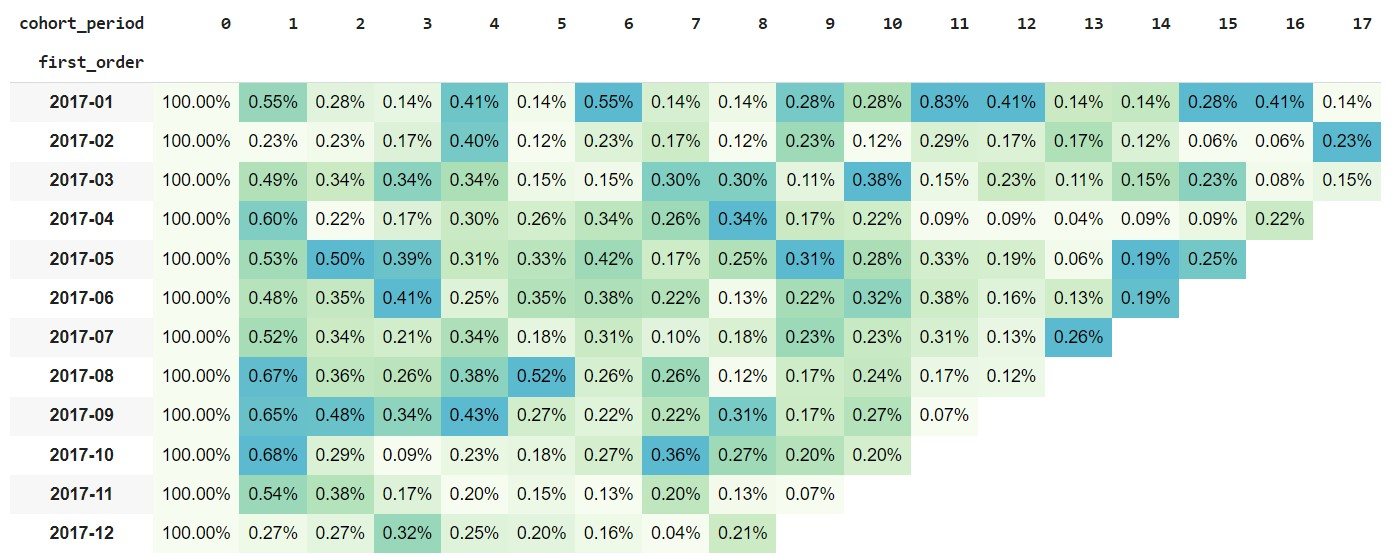

### Ответ: когорта 2017-06 имеет самый высокий Retention на 3-ий месяц (0.41%)

## 6. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию.

Для проведения RFM-анализа для каждого пользователя вычислим следующие метрики:

* Recency (R) как количество дней с момента последней покупки.

* Frequency (F) как общее количество транзакций.

* Monetary Value (М) как общая сумма потраченных денег.

Различные комбинации этих показателей и будут разными сегментами наших пользователей. Период анализа - всё время, за которые у нас есть данные (773 дня между минимальной и максимальной датой в `order_purchase_timestamp`). А день отсчета для вычисления количества дней с последней покупки возьмем как максимальную дату в `order_approved_at` + 1 день.

Сначала снова перекачаем датафреймы и соединим их в один, т.к. нам потребуются данные из всех таблиц.

In [ ]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/QXrVDUoQvFhIcg'
final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']
olist_customers = pd.read_csv(download_url, sep=',')

In [ ]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/8mDFwPNej-Kclg'
final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']
olist_orders = pd.read_csv(download_url, sep=',')

In [ ]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/z7Ou-dti518C6Q'
final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']
olist_order_items = pd.read_csv(download_url, sep=',')

Проверим за какой период у нас есть наблюдения:

In [ ]:
olist_orders['order_purchase_timestamp'] = pd.to_datetime(olist_orders['order_purchase_timestamp'])
olist_orders['order_purchase_timestamp'].min() -olist_orders['order_purchase_timestamp'].max()

Timedelta('-773 days +03:45:01')

Соединим все датафреймы:

In [ ]:
merged = olist_order_items.merge(olist_orders, on = "order_id")\
                          .merge(olist_customers, on = "customer_id")

merged.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP


Отдельно посчитаем общую сумму каждого заказа и количество заказов у каждого пользователя. Этот датафрейм нам пригодится позже.

In [ ]:
quantity_summ = merged.groupby('customer_unique_id', as_index=False).agg({'order_id': pd.Series.nunique, 'price':'sum'})\
                                                                    .rename(columns={'price' : 'order_sum', 'order_id':'quantity'})

quantity_summ.head()

,customer_unique_id,quantity,order_sum
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90
2,0000f46a3911fa3c0805444483337064,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,1,180.00


In [ ]:
merged.shape

(112650, 18)

Оставим только нужные нам столбцы:

In [ ]:
temp = ['customer_unique_id', 'order_id', 'order_approved_at']
RFM = merged[temp]
RFM.head()

,customer_unique_id,order_id,order_approved_at
0,871766c5855e863f6eccc05f988b23cb,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13 09:45:35
1,eb28e67c4c0b83846050ddfb8a35d051,00018f77f2f0320c557190d7a144bdd3,2017-04-26 11:05:13
2,3818d81c6709e39d06b2738a8d3a2474,000229ec398224ef6ca0657da4fc703e,2018-01-14 14:48:30
3,af861d436cfc08b2c2ddefd0ba074622,00024acbcdf0a6daa1e931b038114c75,2018-08-08 10:10:18
4,64b576fb70d441e8f1b2d7d446e483c5,00042b26cf59d7ce69dfabb4e55b4fd9,2017-02-04 14:10:13


In [ ]:
RFM = RFM.rename(columns={'order_approved_at': 'order_date'})

In [ ]:
RFM.shape

(112650, 3)

Проверим наличие дубликатов по `customer_id`:

In [ ]:
RFM[RFM.duplicated('customer_unique_id')].head(10)

,customer_unique_id,order_id,order_date
14,9e4159995424971423b98c4a8bc11529,0008288aa423d2a3f00fcb17cd7d8719,2018-02-15 03:55:52
33,bb8a37225e0279ac8a274c9765617eaf,00143d0f86d6fbd9f9b38ab440ac16f5,2017-10-16 16:07:52
34,bb8a37225e0279ac8a274c9765617eaf,00143d0f86d6fbd9f9b38ab440ac16f5,2017-10-16 16:07:52
43,d1f24d1d504e27bee13b415e40daeab0,001ab0a7578dd66cd4b0a71f5b6e1e41,2017-12-28 02:33:42
44,d1f24d1d504e27bee13b415e40daeab0,001ab0a7578dd66cd4b0a71f5b6e1e41,2017-12-28 02:33:42
49,870a0bdc769f9a7870309036740e79ea,001d8f0e34a38c37f7dba2a37d4eba8b,2017-05-14 17:35:11
76,6bcc1cd0c7f8bffa6f67a6a1fbef5782,002c9def9c9b951b1bec6d50753c9891,2018-05-15 17:37:51
81,2e875ea57961ad115cec13fef0920ae6,002f98c0f7efd42638ed6100ca699b42,2017-08-04 09:30:15
88,fbe6316a06058c651539cbf59ec5a0ef,003324c70b19a16798817b2b3640e721,2017-05-18 19:22:34
92,3c857a6f7828bfb70fb712e2393cfd1b,00337fe25a3780b3424d9ad7c5a4b35e,2017-09-25 17:50:16


In [ ]:
RFM.query('customer_unique_id == "d1f24d1d504e27bee13b415e40daeab0"')

,customer_unique_id,order_id,order_date
42,d1f24d1d504e27bee13b415e40daeab0,001ab0a7578dd66cd4b0a71f5b6e1e41,2017-12-28 02:33:42
43,d1f24d1d504e27bee13b415e40daeab0,001ab0a7578dd66cd4b0a71f5b6e1e41,2017-12-28 02:33:42
44,d1f24d1d504e27bee13b415e40daeab0,001ab0a7578dd66cd4b0a71f5b6e1e41,2017-12-28 02:33:42


Как видно, есть дубликаты, т.е. один и тот же заказ одного и того же пользователя может быть записан несколько раз. Необходимо удалить эти дубликаты, т.к. в противном случае расчет Frequency и Monetary будет некорректным.

In [ ]:
RFM = RFM.drop_duplicates(subset=['customer_unique_id'])

Назначим день, от которого будем считать метрику Recency (последний день по `order_approved_at` + 1 день.)

In [ ]:
RFM['order_date'] = pd.to_datetime(RFM['order_date'])
last_date = RFM['order_date'].max() + timedelta(days=1)

last_date

Timestamp('2018-09-04 17:40:06')

In [ ]:
RFM.head()

,customer_unique_id,order_id,order_date
0,871766c5855e863f6eccc05f988b23cb,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13 09:45:35
1,eb28e67c4c0b83846050ddfb8a35d051,00018f77f2f0320c557190d7a144bdd3,2017-04-26 11:05:13
2,3818d81c6709e39d06b2738a8d3a2474,000229ec398224ef6ca0657da4fc703e,2018-01-14 14:48:30
3,af861d436cfc08b2c2ddefd0ba074622,00024acbcdf0a6daa1e931b038114c75,2018-08-08 10:10:18
4,64b576fb70d441e8f1b2d7d446e483c5,00042b26cf59d7ce69dfabb4e55b4fd9,2017-02-04 14:10:13


Далее сгруппируем RFM таблицу по `customer_id` и посчитаем метрику Recency:

In [ ]:
RFM_groupped = RFM.reset_index().groupby('customer_unique_id', as_index=False)\
                                .agg({'order_date': lambda x: (last_date - x.max()).days})


RFM_groupped.head()

,customer_unique_id,order_date
0,0000366f3b9a7992bf8c76cfdf3221e2,117.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119.0
2,0000f46a3911fa3c0805444483337064,542.0
3,0000f6ccb0745a6a4b88665a16c9f078,326.0
4,0004aac84e0df4da2b147fca70cf8255,293.0


А теперь присоединим датафрейм `quantity_summ` с кол-вом покупок и общей суммой на пользователя, это будем нашими метриками Frequency и Monetary:

In [ ]:
RFM_groupped = RFM_groupped.merge(quantity_summ, on='customer_unique_id')

RFM_groupped.head()

,customer_unique_id,order_date,quantity,order_sum
0,0000366f3b9a7992bf8c76cfdf3221e2,117.0,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119.0,1,18.90
2,0000f46a3911fa3c0805444483337064,542.0,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,326.0,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,293.0,1,180.00


Переименуем столбцы:

In [ ]:
RFM_groupped = RFM_groupped.rename(columns={'customer_unique_id' : 'customer_id',
                                            'order_date': 'recency',
                                            'quantity': 'frequency',
                                            'order_sum': 'monetary'})

In [ ]:
RFM_groupped.head()

,customer_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,117.0,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119.0,1,18.90
2,0000f46a3911fa3c0805444483337064,542.0,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,326.0,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,293.0,1,180.00


Далее определим границы метрик для каждого сегмента, для этого будем использовать перцинтили. Т.к. при использовании стандартного варианта (0.25, 0.5 и 0.75 перцинтиль) границы получаются очень широкими, возьмем более узкие диапазоны - 0.2, 0.4, 0.6, 0.8. Так же опытным путем было выяснено, что из-за того, что в параметре frequency у нас очень небольшой диапазон значений, при использовании перцинтилий все границы принимают значение "1", хотя у нас есть пользователи, совершившие покупку и 4 и 9 и даже 16 раз. Поэтому значения перцентилей для frequency мы зададим вручную и добавим в словарь.

In [ ]:
# уникальные значения frequency

RFM_groupped.frequency.unique()

array([ 1,  2,  3,  4,  6,  7,  5,  9, 16])

In [ ]:
quantiles = RFM_groupped[['recency',	'monetary']].quantile(q=[0.2, 0.4, 0.6, 0.8])
quantiles

,recency,monetary
0.2,100.0,39.9
0.4,184.0,69.9
0.6,275.0,109.9
0.8,390.0,179.9


In [ ]:
quantiles = quantiles.to_dict()
quantiles.update({'frequency' : {0.2:2, 0.4:4, 0.6:7, 0.8:9}})

Напишем функции для деления пользователей на сегменты по разным показателям RFM:

In [ ]:
RFM_segment = RFM_groupped

In [ ]:
def RScore(x,p,d):
    if x <= d[p][0.20]:
        return 5
    elif x <= d[p][0.40]:
        return 4
    elif x <= d[p][0.60]:
        return 3
    elif x<=d[p][0.80]:
        return 2
    else:
        return 1

def FMScore(x,p,d):
    if x <= d[p][0.20]:
        return 1
    elif x <= d[p][0.40]:
        return 2
    elif x <= d[p][0.60]:
        return 3
    elif x<=d[p][0.80]:
        return 4
    else:
        return 5

In [ ]:
RFM_segment['R'] = RFM_segment['recency'].apply(RScore, args=('recency' ,quantiles))
RFM_segment['F'] = RFM_segment['frequency'].apply(FMScore, args=("frequency", quantiles))
RFM_segment['M'] = RFM_segment['monetary'].apply(FMScore, args=('monetary', quantiles))
RFM_segment['RFM_Score'] = RFM_segment.R.map(str) + RFM_segment.F.map(str) + RFM_segment.M.map(str)

RFM_segment.head()

,customer_id,recency,frequency,monetary,R,F,M,RFM_Score
0,0000366f3b9a7992bf8c76cfdf3221e2,117.0,1,129.90,4,1,4,414
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119.0,1,18.90,4,1,1,411
2,0000f46a3911fa3c0805444483337064,542.0,1,69.00,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,326.0,1,25.99,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,293.0,1,180.00,2,1,5,215


Для каждого RFM-сегмента построим границы метрик recency, frequency и monetary для интерпретации этих кластеров.

In [ ]:
for score in range(1,6):
    print(f'R={score} is between {RFM_segment.loc[RFM_segment.R == score].recency.min()} and {RFM_segment.loc[RFM_segment.R == score].recency.max()}')
    print(f'F={score} is between {RFM_segment.loc[RFM_segment.F == score].frequency.min()} and {RFM_segment.loc[RFM_segment.F == score].frequency.max()}')
    print(f'M={score} is between {RFM_segment.loc[RFM_segment.M == score].monetary.min()} and {RFM_segment.loc[RFM_segment.M == score].monetary.max()}')
    print()

R=1 is between 391.0 and 719.0
F=1 is between 1 and 2
M=1 is between 0.85 and 39.9

R=2 is between 276.0 and 390.0
F=2 is between 3 and 4
M=2 is between 39.900000000000006 and 69.9

R=3 is between 185.0 and 275.0
F=3 is between 5 and 7
M=3 is between 69.94 and 109.9

R=4 is between 101.0 and 184.0
F=4 is between 9 and 9
M=4 is between 109.94999999999999 and 179.9

R=5 is between 1.0 and 100.0
F=5 is between 16 and 16
M=5 is between 179.91 and 13440.0



Проставим лейблы по сумме и давности покупок для каждого сегмента пользователей для их удобного анализа:

In [ ]:
segt_map = {
    r'[1-2][1-2]': 'Sleeping',              # купили давно и на маленькую сумму
    r'[1-2][3-4]': 'At risk',               # купили давно, сумма побольше
    r'[1-2]5': 'Can\'t loose',              # купили давно, на большую сумму, надо возвращать
    r'3[1-2]': 'About to sleep',            # купили относительно давно и мало
    r'[3-4][4-5]': 'Loyal customers',       # купили относительно недавно и на большую сумму
    r'33': 'Need attention',                # купили относительно недавно и на среднюю сумму
    r'41': 'Promising',                     # купили относительно недавно и на маленькую сумму
    r'51': 'New customers',                 # купили недавно и на маленькую сумму
    r'[4-5][2-3]': 'Potential loyalists',   # купили недавно и на среднюю сумму
    r'5[4-5]': 'Champions'                  # купили недавно и на большую сумму
}

In [ ]:
RFM_segment['segment'] = RFM_segment['R'].map(str) + RFM_segment['M'].map(str)
RFM_segment['segment'] = RFM_segment['segment'].replace(segt_map, regex=True)
RFM_segment.head()

,customer_id,recency,frequency,monetary,R,F,M,RFM_Score,segment
0,0000366f3b9a7992bf8c76cfdf3221e2,117.0,1,129.90,4,1,4,414,Loyal customers
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119.0,1,18.90,4,1,1,411,Promising
2,0000f46a3911fa3c0805444483337064,542.0,1,69.00,1,1,2,112,Sleeping
3,0000f6ccb0745a6a4b88665a16c9f078,326.0,1,25.99,2,1,1,211,Sleeping
4,0004aac84e0df4da2b147fca70cf8255,293.0,1,180.00,2,1,5,215,Can't loose


Визуилизируем размер каждого сегмента наших пользователей:

In [ ]:
RFM_segment['all'] = 'all'

fig = px.treemap(RFM_segment, path=['all', 'segment'], color_discrete_sequence=px.colors.qualitative.Set3)
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.update_layout(title='Соотношение размеров сегментов пользователей')

fig.data[0].textinfo = 'label+text+value+percent root'

fig.layout.hovermode = False

fig.show()

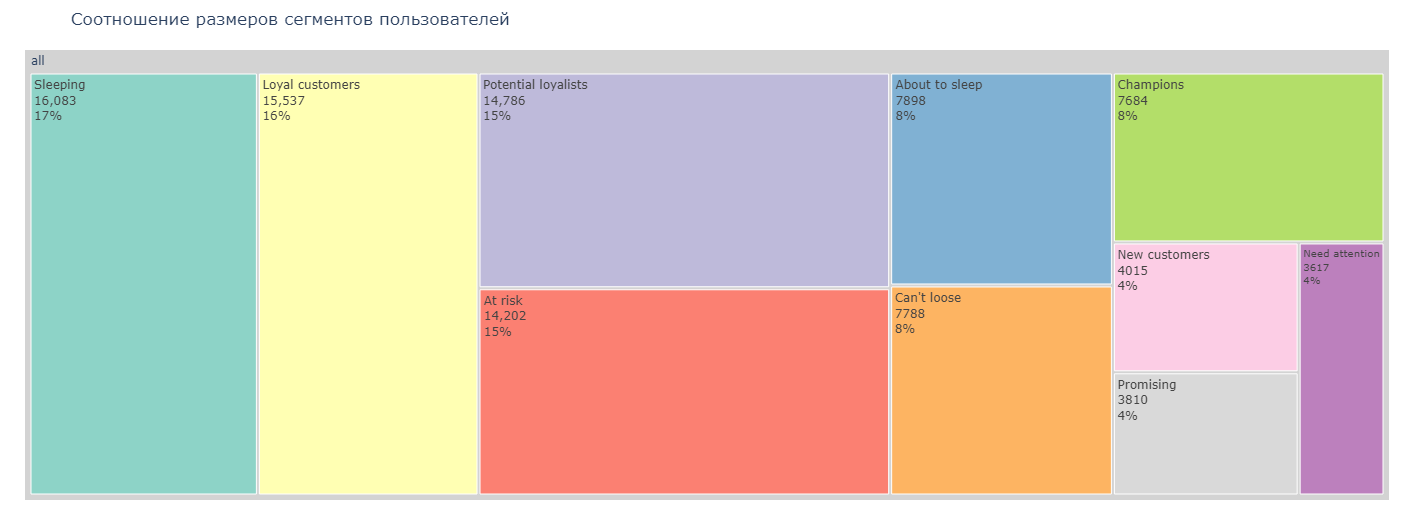

### Выводы:

Как можно видеть, у нас большое количество спящих клиентов  - это наши потенциально доходные клиенты, нужно стимулировать их к покупкам, но не тратить на это большой бюджет (например, e-mail рассылки с акциями или промокодами)

Также нужно обратить внимание на потенциально лояльных клиентов - их нужно вовлекать в активные покупки и стимулировать их тратить больше. Для них имеет смысл делать более индивидуальные предложения и акции.

Помимо этого, нельзя забывать про клиентов в зоне риска, тех, которых мы не можем потерять и требующих внимания. У них большой потенциал и с ними желательно работать более точечно на удержание и повышение лояльности.

### В ходе работы было сделано:

1. Проведен предварительный анализ данных

2. Сформулировано, что является "покупкой" применительно к имеющимся данным

3. Посчитано, сколько пользователей совершили покупку только один раз

4. Сформулированы причины, по которым не доставляются заказы, и посчитано среднее количество не доставленных заказов в их разрезе

5. Определено, в какой день недели какой товар чаще всего покупается

6. Посчитано, сколько у каждого из пользователей в среднем покупок в неделю

7. Проведен когортный анализ пользователей и выявлена когорта с самым высоким retention на 3-й месяц в период с января по декабрь 2017 года

8. Построена RFM-сегментация пользователей и визуализировано соотношение размеров сегментов